# **ICE: Exploratory Data Analysis (EDA) through Descriptive Statistics**

## Name: Cabot Steward

## *DATA 3300*

In this assignment on exploratory data analysis (EDA) through descriptive statistics, we will start by examining the normal distribution using histogram plots and comparing it to non-normal distributions. Additionally, we'll cover descriptive statistics, including measures of central tendency, shape, and spread. Finally, we'll form hypotheses based on these descriptive statistics to compare different groups and draw meaningful insights from the data




## **Company Scenario**

> GridX, a Greentech firm, focuses on large-scale decarbonization by providing analytics on clean energy options to utility and energy companies. They create models for various transitions to clean energy and offer insights and advice on pricing. This helps companies understand the financial impact of adopting greener technologies. GridX's software suite includes programs for billing analytics, customer service, and bundling clean energy options. Currently GridX operates in the US, but is looking to expand to other countries.

> Your task is to assist GridX in identifying which countries' utility and energy companies they should prioritize for marketing (beyond the US). Use descriptive statistics to explore the dataset, identify patterns, and develop hypotheses that can inform recommendations for GridX's sales team.


**Dataset variables**
* Country: Name of the country
* Region: Geographic region to which the country belongs
* SDGi (Sustainable Development Goals Index): The SDG Index evaluates countries based on indicators such as poverty, education, health, and environmental sustainability, providing a comprehensive overview of their efforts and achievements in sustainable development
* Life Expectancy:  Average life expectancy in years
* HDI (Human Development Index): Human Development Index, a composite index measuring life expectancy, education, and per capita income
* Per Capita GDP: Gross Domestic Product (GDP) per capita.
* Income Group: Income group classification (e.g., LI for Low Income, UM for Upper Middle Income)
* Population: Country population
* Carbon Footprint: Ecological footprint of carbon emissions, measured in global hectares per person
* Total Ecological Footprint (Consumption): Total ecological footprint of consumption, measured in global hectares per person
* Ecological (Deficit) or Reserve: The difference between total ecological footprint and total biocapacity, indicating whether the country has an ecological deficit (negative value) or reserve (positive value)
* Number of Earths Required: The number of Earths that would be required if everyone lived like the average person in the country.
* Total Biocapacity: Total biocapacity, measured in global hectares per person



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('Global Ecological Footprint 2023-1.csv', encoding='latin-1')
df.head()

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Carbon Footprint,Total Ecological Footprint (Consumption),Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required
0,Afghanistan,Middle East/Central Asia,52.5,62,0.48,NaN,LI,40.8,0.2,0.8,0.51,-0.29,0.53
1,Albania,Other Europe,71.6,76,0.8,14889,UM,2.9,0.7,2.1,1.18,-0.89,1.37
2,Algeria,Africa,71.5,76,0.75,11137,UM,45.4,1.2,2.2,0.66,-1.56,1.47
3,Angola,Africa,50.9,62,0.59,6304,LM,35.0,0.3,0.9,1.59,0.73,0.57
4,Antigua and Barbuda,Central America/Caribbean,NaN,78,0.79,18749,HI,0.1,NaN,2.9,0.92,-2.02,1.94


**1. If our main goal is to identify countries which should be prioritized by GridX, what should be some particular variables of interest for us to prioritize? Why?**

* carbon footprint -> to know their current impact is significant
* gdp -> can they afford the solution
* total ecological footprint -
* population - per capita calculations
* income group
* country

**2. Take a minute - come up with a question (or two) you'd be interested in investigating related to any of these variables of interest we've just listed above -- in the context of identifying countries that should be prioritized by GridX**

1. Top 5 countries by carbon footprint per capita?  
2. Correlation between income group and total ecological footprint?

**We can begin to explore these types of questions by performing EDA through descriptive statistics. But before we know which descriptive stats to prioritize, it can be helpful to examine the distribution of a variable to know whether our observations follow a normal distribution (or not).**

### Begin by checking which variables can be evaluated

In [3]:
# check info and vars
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   182 non-null    object 
 1   Region                                    182 non-null    object 
 2   SDGi                                      159 non-null    object 
 3   Life Exectancy                            176 non-null    object 
 4   HDI                                       173 non-null    object 
 5   Per Capita GDP                            165 non-null    object 
 6   Income Group                              178 non-null    object 
 7   Population (millions)                     182 non-null    float64
 8   Carbon Footprint                          152 non-null    float64
 9   Total Ecological Footprint (Consumption)  181 non-null    float64
 10  Total biocapacity                     

### Convert variables that should be floats!

In [4]:
# convert as necessary
for col in ['SDGi', 'Life Exectancy', 'HDI', 'Per Capita GDP', ]:
    df[col] = pd.to_numeric(df[col], errors='coerce') # convert each column to a numeric if possible

# Print some info
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   182 non-null    object 
 1   Region                                    182 non-null    object 
 2   SDGi                                      158 non-null    float64
 3   Life Exectancy                            175 non-null    float64
 4   HDI                                       171 non-null    float64
 5   Per Capita GDP                            163 non-null    float64
 6   Income Group                              178 non-null    object 
 7   Population (millions)                     182 non-null    float64
 8   Carbon Footprint                          152 non-null    float64
 9   Total Ecological Footprint (Consumption)  181 non-null    float64
 10  Total biocapacity                     

(None,
                Country                     Region  SDGi  Life Exectancy   HDI  \
 0          Afghanistan   Middle East/Central Asia  52.5            62.0  0.48   
 1              Albania               Other Europe  71.6            76.0  0.80   
 2              Algeria                     Africa  71.5            76.0  0.75   
 3               Angola                     Africa  50.9            62.0  0.59   
 4  Antigua and Barbuda  Central America/Caribbean   NaN            78.0  0.79   
 
    Per Capita GDP Income Group  Population (millions)  Carbon Footprint  \
 0             NaN           LI                   40.8               0.2   
 1         14889.0           UM                    2.9               0.7   
 2         11137.0           UM                   45.4               1.2   
 3          6304.0           LM                   35.0               0.3   
 4         18749.0           HI                    0.1               NaN   
 
    Total Ecological Footprint (Consumpti

### Visualize the Distributions

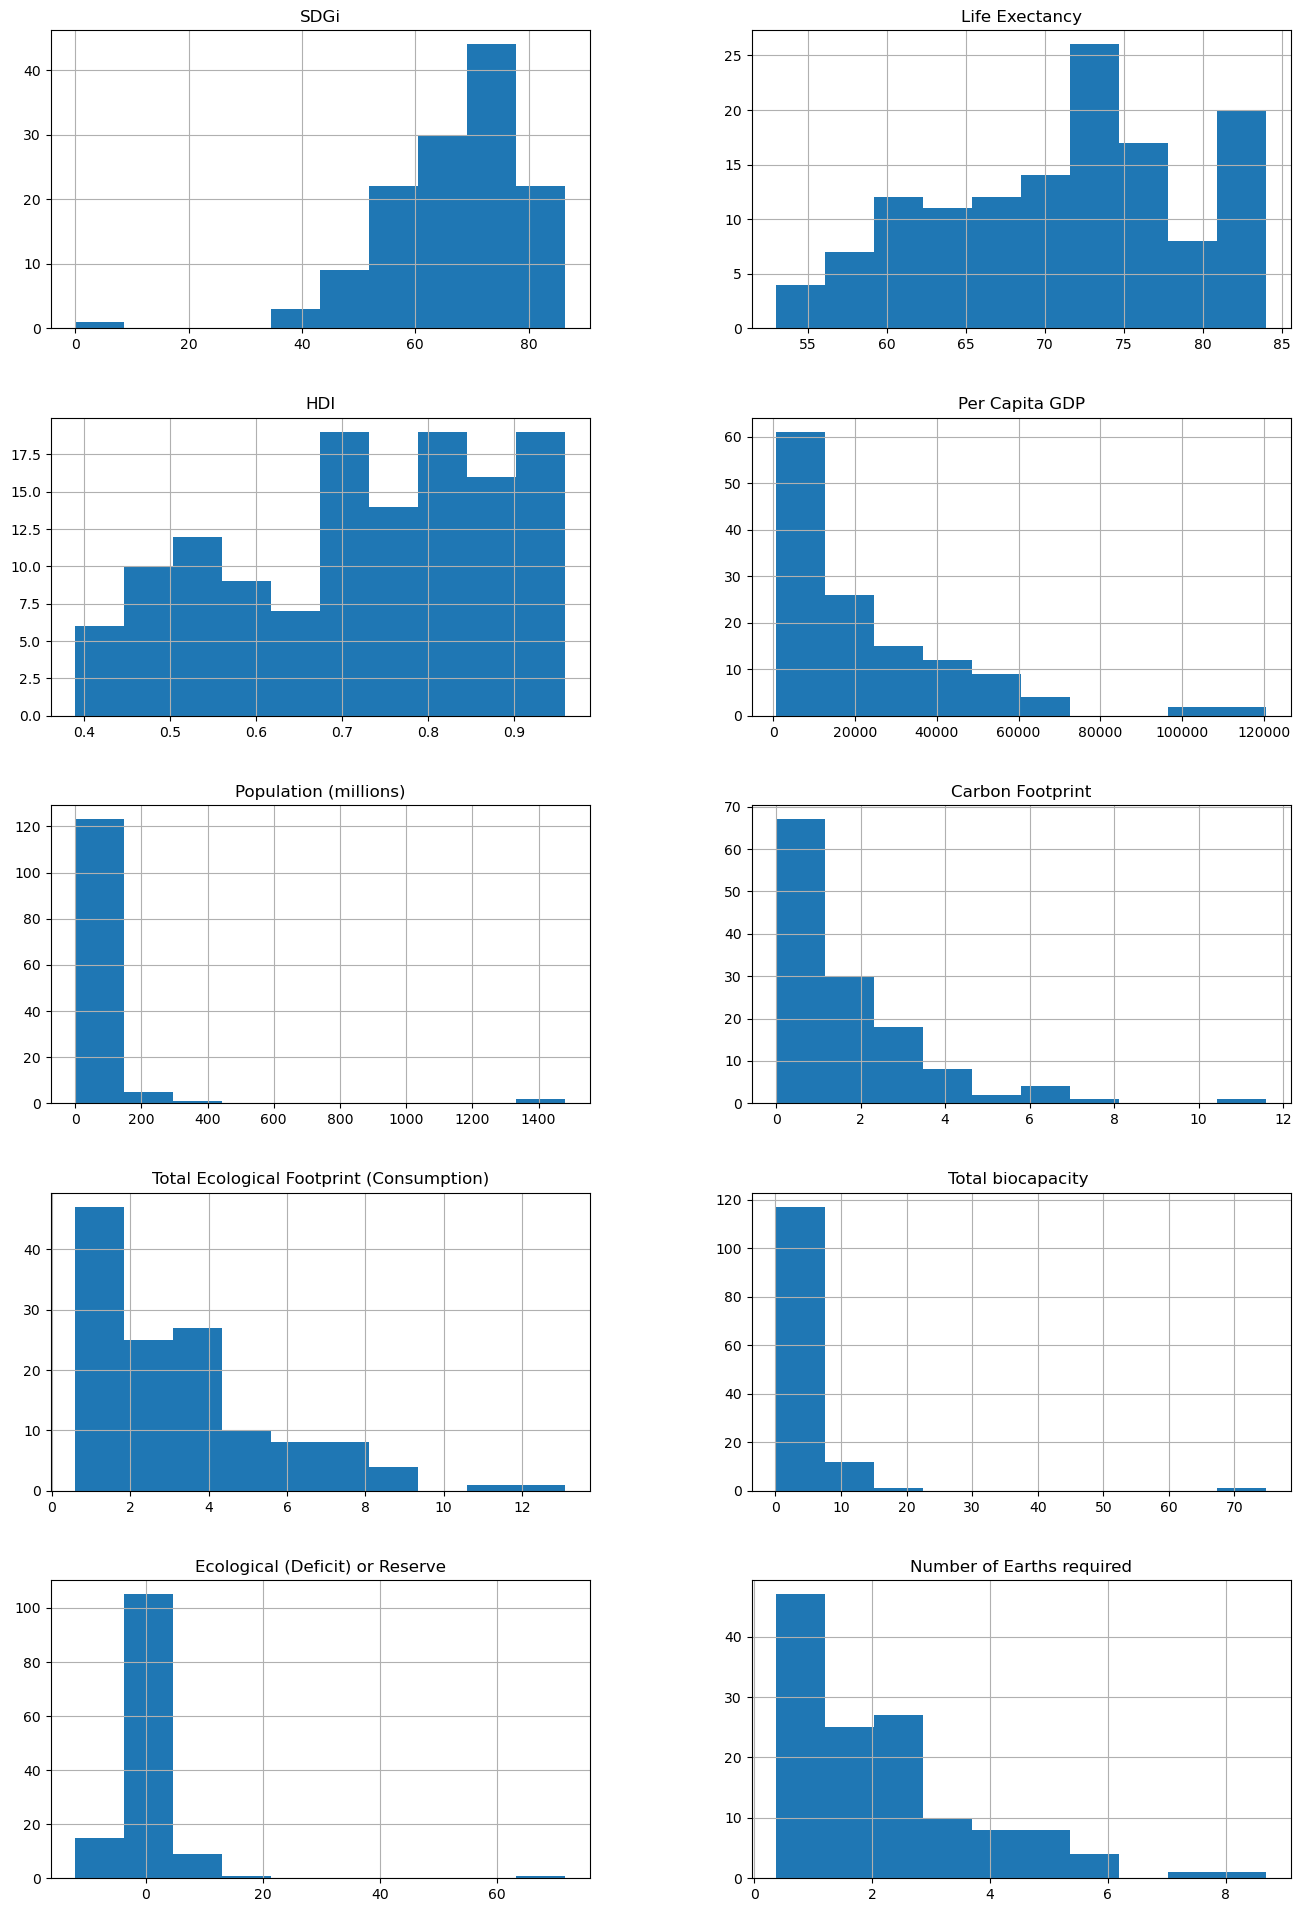

In [5]:
df2 = df.dropna()
df2.hist(layout=(5, 2), figsize=(16, 24), bins=10) #generate histograms of remaining numerical vars
plt.show()

**3. How would we describe the shape of the following distributions?**

* SDGi: Left skewed, roughly unimodal
* HDI: not unimodal, it technically is quadmodal, but slightly left skewed if we had to.
* Carbon Footprint: right skewed, roughly unimodal
* Ecological Deficit: technically right skewed, leptokurtic

**4. What implications do the shape of these distributions have for interpreting descriptive statistics? What measure of central tendency should NOT be relied on?**

* Standard deviations will likely be skewed as there are outliers but we should utalize this!  This is important
* On top of this average will be skewed so should be avoided if possible

## Descriptive Statistics

**Next, let's start examining some descriptive statistics. We'll begin by grouping our descriptive stats by Region, then we can also drill down to specific countries!**

**5. Return to your posed question(s) above. What information can you gather from this descriptive statistics table to address your question(s)?**

* using the median values we can compare the regional differences between the carbon vs total ecological footprint and hypothesize that countries with carbon footprint.

In [6]:
pd.set_option('display.max_columns', None) # display all columns in dataframe
df2.groupby('Region')['Carbon Footprint'].median().sort_values(ascending=False)

Region
North America                4.60
EU-27                        2.45
Middle East/Central Asia     2.40
Other Europe                 1.80
Asia-Pacific                 0.80
Central America/Caribbean    0.80
South America                0.70
Africa                       0.20
Name: Carbon Footprint, dtype: float64

**6. Which region has the most spread in Carbon Footprint? What measure(s) indicate this?**

In [7]:
df2.groupby('Region')['Carbon Footprint'].std().sort_values(ascending=False)

Region
Middle East/Central Asia     2.972063
North America                2.080865
Asia-Pacific                 1.856199
EU-27                        1.330202
Central America/Caribbean    1.212286
Other Europe                 0.775743
South America                0.512522
Africa                       0.451457
Name: Carbon Footprint, dtype: float64

* The middle east/central asia has the most spread.  We can see this from the standard deviaition that is shown above.

**7. Take a few minutes to explore the full descriptive stats table grouped by Region. Note any interesting pattern in your descriptive statistics table, and create a hypothesis as to the cause of this finding.**

In [10]:
df2[['Region', 'Population (millions)', 'Carbon Footprint']].groupby('Region').describe()

Population (millions)                                \
                                          count        mean         std   min   
Region                                                                          
Africa                                     37.0   30.883784   41.040289   1.0   
Asia-Pacific                               21.0  196.495238  422.222628   0.4   
Central America/Caribbean                  11.0    6.318182    5.606749   0.3   
EU-27                                      22.0   19.090909   23.745895   0.6   
Middle East/Central Asia                   19.0   20.210526   25.850530   1.8   
North America                               3.0  168.266667  151.563760  38.4   
Other Europe                               10.0   25.080000   47.015785   0.6   
South America                               8.0   48.225000   69.965333   0.6   

                                                           Carbon Footprint  \
                              25%     50%      75%     max            count   
Region                                                                        
Africa                      5.800   17.70   35.000   216.7             37.0   
Asia-Pacific                5.900   33.20  125.600  1480.6             21.0   
Central America/Caribbean   2.200    5.20    8.950    18.6             11.0   
EU-27                       5.525    9.85   17.175    83.9             22.0   
Middle East/Central Asia    4.850   10.00   25.200    86.0             19.0   
North America              85.000  131.60  233.200   334.8              3.0   
Other Europe                2.975    4.80    9.225   145.8             10.0   
South America              10.825   26.50   47.375   215.4              8.0   

                                                                              
                               mean       std  min    25%   50%    75%   max  
Region                                                                        
Africa                     0.329730  0.451457  0.0  0.100  0.20  0.300   2.2  
Asia-Pacific               1.738095  1.856199  0.1  0.300  0.80  2.600   6.8  
Central America/Caribbean  1.181818  1.212286  0.1  0.550  0.80  1.300   4.5  
EU-27                      2.609091  1.330202  1.4  1.925  2.45  2.775   8.0  
Middle East/Central Asia   3.173684  2.972063  0.2  1.100  2.40  4.700  11.6  
North America              3.500000  2.080865  1.1  2.850  4.60  4.700   4.8  
Other Europe               1.920000  0.775743  0.7  1.575  1.80  2.075   3.6  
South America              0.962500  0.512522  0.5  0.575  0.70  1.450   1.7

Companies with a higher population don't always have a higher carbon footprint.  EU-27 and Africa are prime examples

### Let's Examine the Descriptive Stats of Two Regions we'd like to Compare...

**8. What region would you recommend targeting and why? What descriptive stats are you basing this on and what variables?**

In [13]:
# compare two regions of interest
df2.groupby('Region')[['Population (millions)', 'Total Ecological Footprint (Consumption)']].describe().loc[['EU-27', 'Africa']]

Population (millions)                                                   \
                       count       mean        std  min    25%    50%     75%   
Region                                                                          
EU-27                   22.0  19.090909  23.745895  0.6  5.525   9.85  17.175   
Africa                  37.0  30.883784  41.040289  1.0  5.800  17.70  35.000   

              Total Ecological Footprint (Consumption)                      \
          max                                    count      mean       std   
Region                                                                       
EU-27    83.9                                     22.0  5.263636  1.925653   
Africa  216.7                                     37.0  1.367568  0.674559   

                                     
        min    25%   50%  75%   max  
Region                               
EU-27   2.7  3.925  4.55  6.2  11.0  
Africa  0.6  0.900  1.10  1.7   3.2

lets narrow in on EU-27 because they have high variabilitiy (std) in their total ecological footprint, meaning it might be more clear which countries within this region should be targeted

### Next, Let's drill down more into one specific region and identify the countries that we might target...

In [20]:
df3 = df2[df2['Region'] == 'EU-27']
print(len(df3))
df3.head()

22


,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Carbon Footprint,Total Ecological Footprint (Consumption),Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required
8,Austria,EU-27,82.3,81.0,0.92,55460.0,HI,9.1,3.2,5.6,2.89,-2.73,3.73
14,Belgium,EU-27,79.7,82.0,0.94,52749.0,HI,11.7,3.6,6.7,1.16,-5.53,4.43
24,Bulgaria,EU-27,74.3,72.0,0.80,24490.0,UM,6.8,1.9,3.6,3.08,-0.50,2.37
44,Czech Republic,EU-27,80.5,77.0,0.89,40707.0,HI,10.7,2.8,5.1,2.52,-2.56,3.37
45,Denmark,EU-27,85.6,81.0,0.95,59333.0,HI,5.8,2.9,7.3,4.22,-3.07,4.82


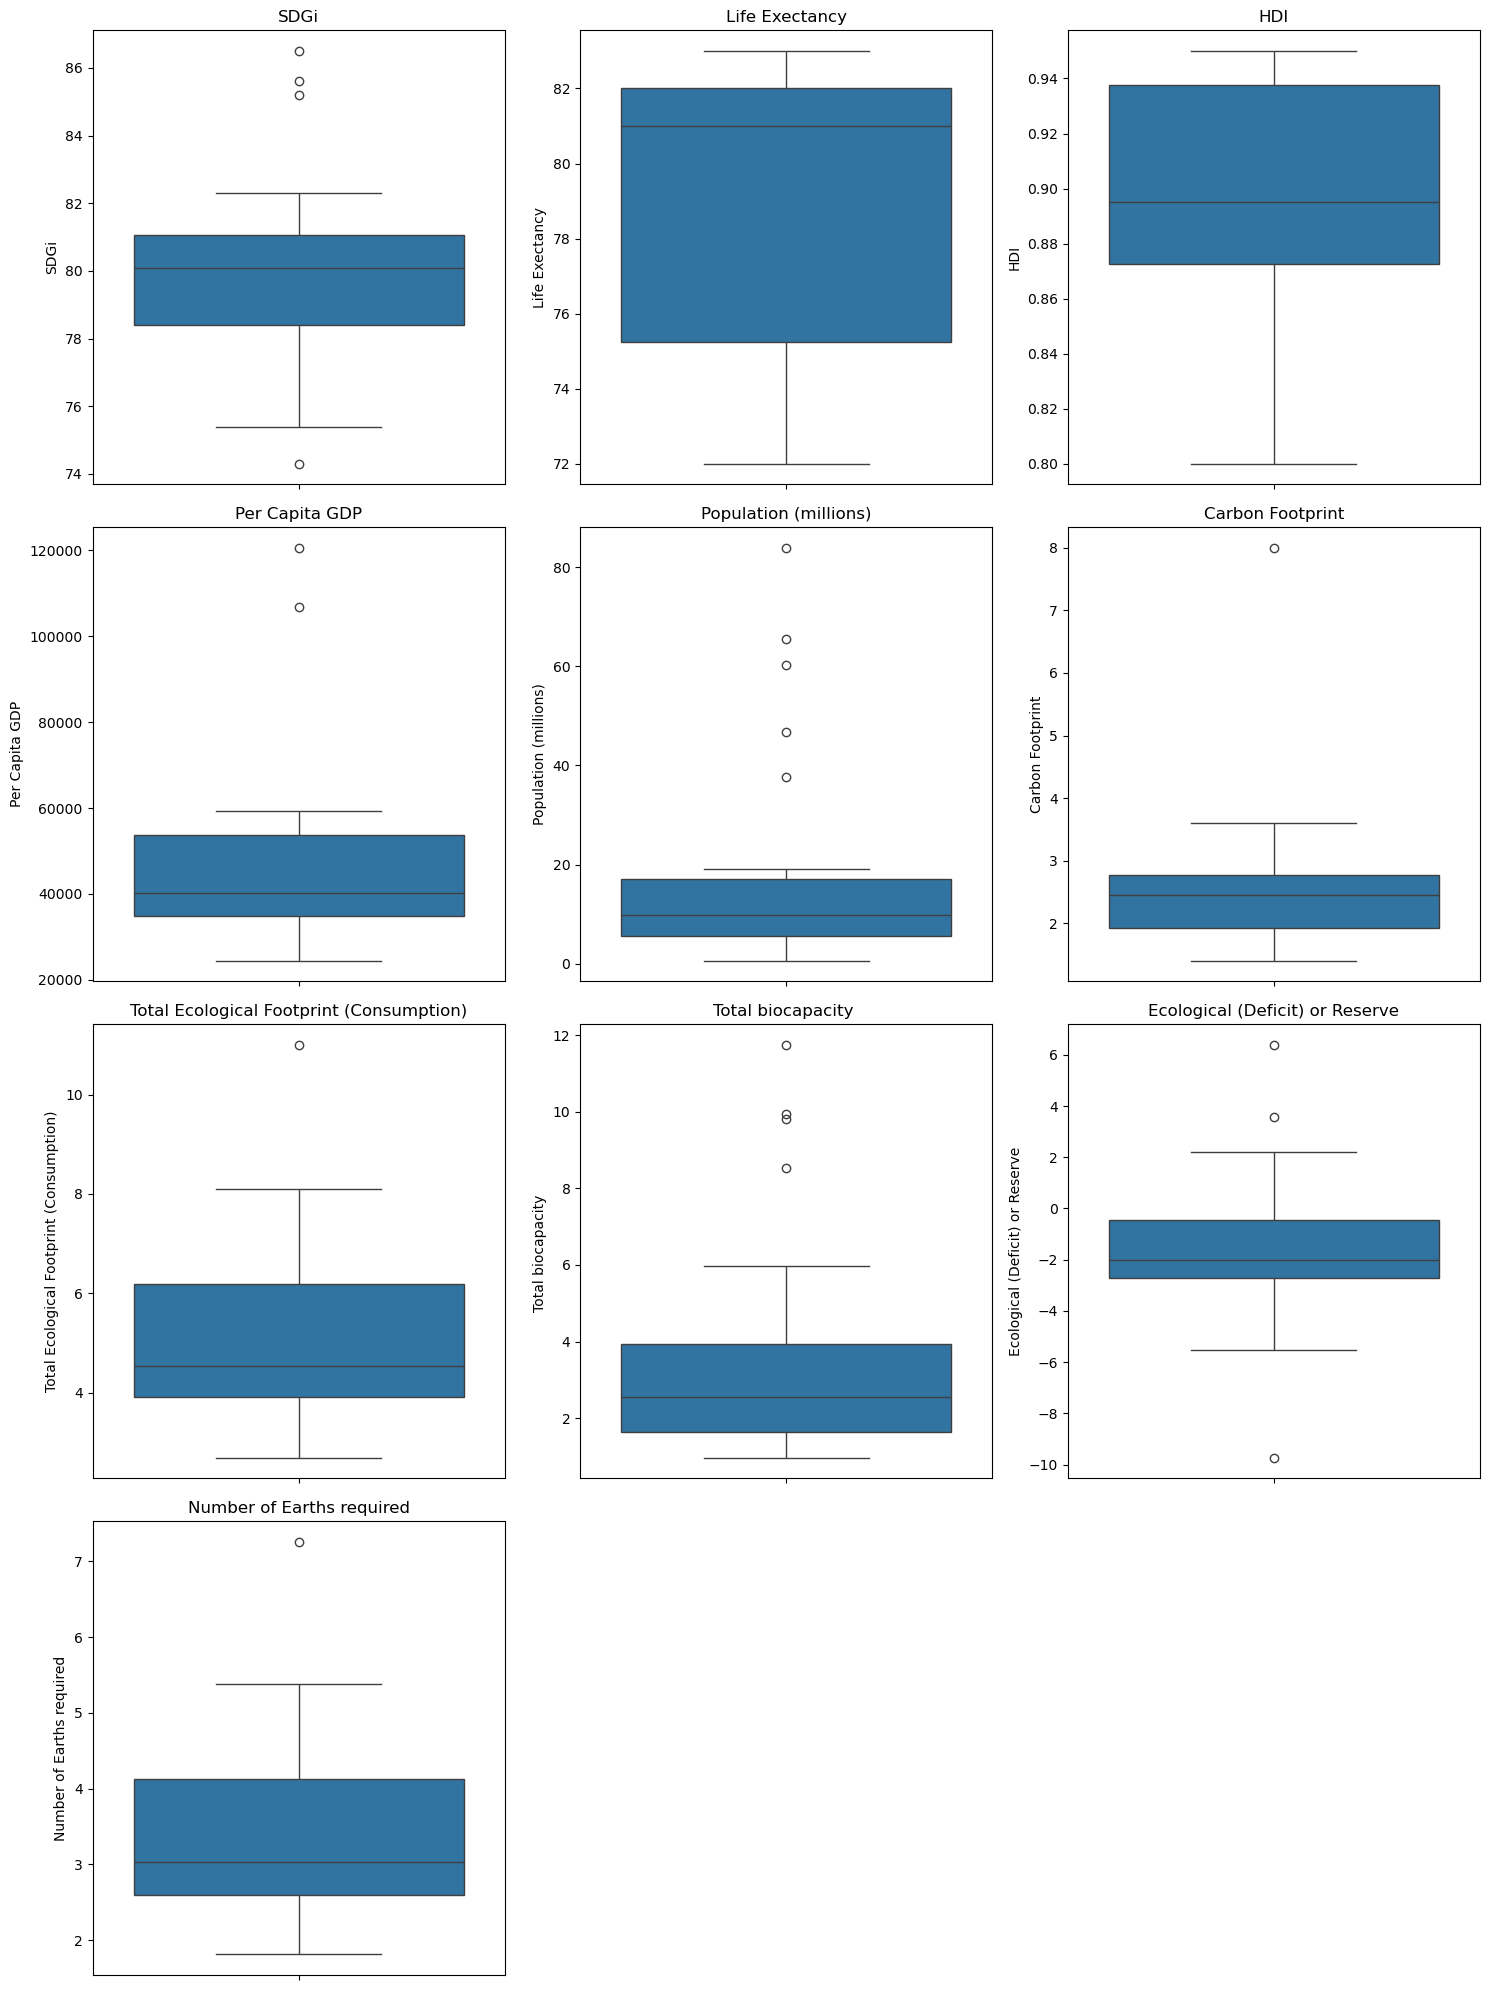

In [21]:
numeric_cols = df3.select_dtypes(include=np.number).columns
num_cols = len(numeric_cols)
num_rows = (num_cols + 2) // 3  # 

plt.figure(figsize=(15, 5 * num_rows))  # Add comments

for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 3, i + 1)  # Add comments
    sns.boxplot(y=df3[col])
    plt.title(col)

plt.tight_layout()  # Add comments
plt.show()


**9. What observations can we make from these distributions of just this region's countries that might help us narrow down on countries of interest?**




gdp per capita

**10. Visualize a relationship between two variables that investigates your hypothesis, originally posed questions, or that you'd like to explore based on observations above.**

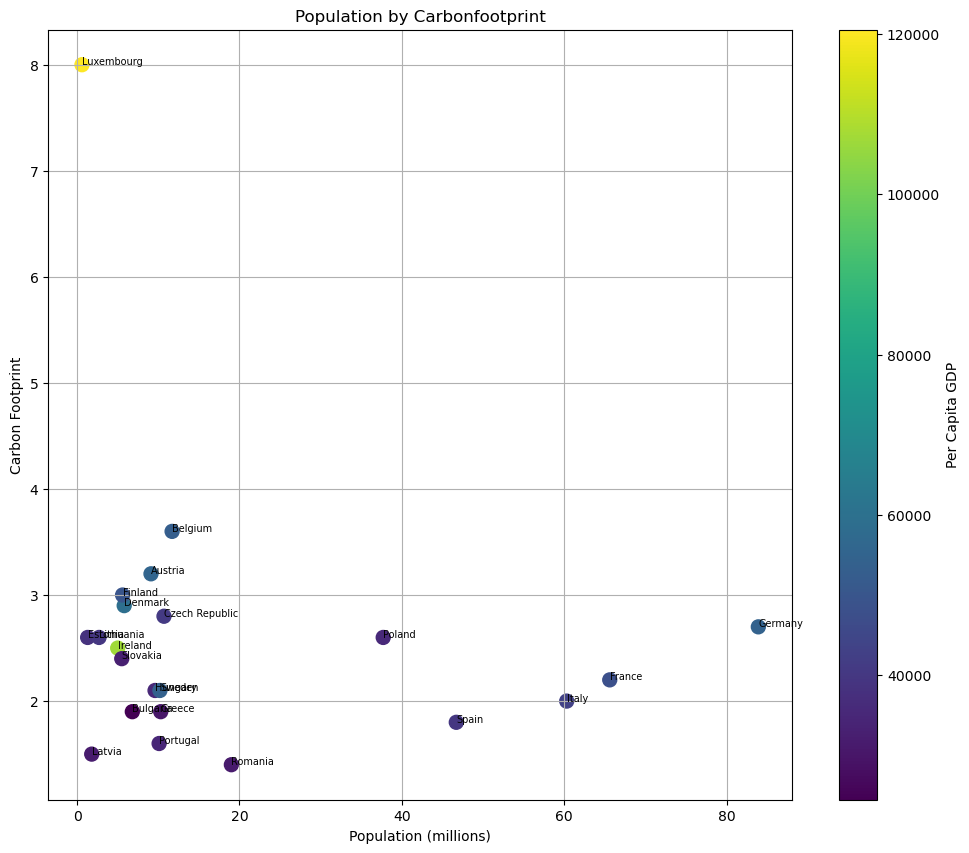

In [35]:
plt.figure(figsize=(12, 10))

# Use a colormap for the scatter plot
scatter = plt.scatter(df3['Population (millions)'], df3['Carbon Footprint'],
                      c=df3['Per Capita GDP'], cmap='viridis', s=100)

# Add labels for each point
for i, row in df3.iterrows():
    plt.text(row['Population (millions)'], row['Carbon Footprint'], row['Country'], fontsize=7, ha='left')

# Add colorbar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Per Capita GDP')

plt.title('Population by Carbonfootprint')
plt.xlabel('Population (millions)')
plt.ylabel('Carbon Footprint')
plt.grid(True)
plt.show()


**11. Based on your findings, which countries would you recommend GridX sales team focus on, and why?**

Luxembourg, Belgium, and Austria would be good ones to start the process working on.  They have a medium size of population while having a decent amount of carbon footprint.  You want to find a country that has a high gdp, and high carbon footprint.  Germany is massive with a low carbon footprint.